# What is San Francisco - Buildings and Housing EDA

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob as glob
import seaborn as sns; sns.set()

## Table of Contents

In [19]:
glob.glob('../data/Building and Housing/*.csv')

['../data/Building and Housing/Library_Usage.csv',
 '../data/Building and Housing/Schools.csv',
 '../data/Building and Housing/Housing_Inventory_Data.csv',
 '../data/Building and Housing/Tall_Building_Inventory.csv',
 '../data/Building and Housing/Affordable_Housing_Pipeline.csv']

## Clean & Wrangle Data

Column Names
- ext_use: Existing use of Property
- prop_use: Proposed use of Property
- units: 

In [20]:
# Import Housing Inventory Data
housing_inventory = pd.read_csv('../data/Building and Housing/Housing_Inventory_Data.csv')

In [21]:
# Clean Columns
housing_inventory.columns = [x.lower().replace(' ','_') for x in housing_inventory.columns]

# Clean Address with Geolocations
housing_inventory = housing_inventory[housing_inventory['the_geom'].notnull()]

In [22]:
housing_inventory.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4220 entries, 1 to 4242
Data columns (total 30 columns):
app_no                            4193 non-null object
fm                                4220 non-null int64
number                            4220 non-null int64
street                            4220 non-null object
st_type                           4210 non-null object
fulladdress                       4220 non-null object
descript                          3450 non-null object
ext_use                           2580 non-null object
prop_use                          3612 non-null object
block                             4220 non-null object
lot                               4220 non-null object
blocklot                          4220 non-null object
units                             4220 non-null int64
netunits                          4220 non-null int64
aff_hsg                           2847 non-null float64
aff_target                        1083 non-null object
action          

In [23]:
housing_inventory['the_geom'][1].replace('POINT (','')

'-122.435515327909 37.717578811655)'

In [24]:
#
housing_inventory = housing_inventory.copy()

# Geom
housing_inventory['the_geom'] = housing_inventory['the_geom'].str.replace('POINT \(','').str.replace(')','')

# Geom to Lat Lon
housing_inventory['lat'] = pd.to_numeric(housing_inventory['the_geom'].str.split(' ').apply(lambda x: x[0]))
housing_inventory['lon'] = pd.to_numeric(housing_inventory['the_geom'].str.split(' ').apply(lambda x: x[1]))

## By Type

In [25]:
# Plot Housing Units
housing_units = housing_inventory['units'].value_counts()

In [26]:
housing_inventory['prop_use'].value_counts()

APARTMENTS                      1302
2 FAMILY DWELLING               1142
1 FAMILY DWELLING               1090
MISC GROUP RESIDNS.               13
RESIDENTIAL HOTEL                 11
OFFICE                             9
SCHOOL                             8
ARTIST LIVE/WORK                   6
RETAIL SALES                       4
DETACHED SFH                       3
FOOD/BEVERAGE HNDLNG               3
PUBLIC ASSMBLY OTHER               2
DAY CARE HOME GT 12                2
STUDENT HOUSING                    2
TOURIST HOTEL/MOTEL                1
CHURCH                             1
CLINICS-MEDIC/DENTAL               1
ARTIST LIVE/ WORK                  1
NITE CLUB                          1
VACANT LOT                         1
WAREHOUSE,NO FRNITUR               1
SCHOOL ADDITION                    1
MOVING & STORAGE                   1
1 FAMILY DWELLING & FOOD/BEV       1
SOCIAL CARE FACILITY               1
FOOD/BEVERAGE HND                  1
WORKSHOP COMMERCIAL                1
D

In [31]:
'''Write code that applies the KMeans clustering method from scikit-learn to this matrix.'''
from sklearn.cluster import KMeans

model = KMeans()

## Full Housing Inventory

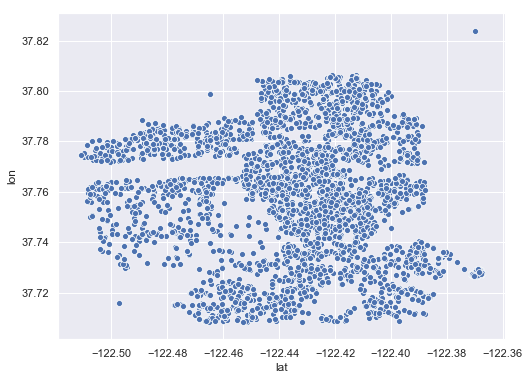

In [27]:
# Full Housing Investory Mapped
_ = plt.figure(figsize=(8,6))
_ = sns.scatterplot(x='lat', y='lon', data=housing_inventory)

In [36]:
#
x_cols = ['lat','lon']

# Fit KMeans Model
model.fit(housing_inventory[x_cols])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

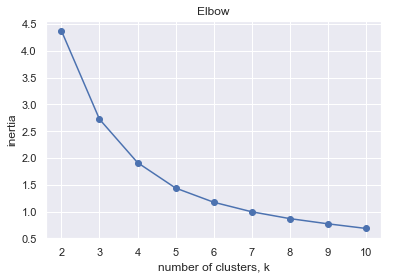

In [48]:
ks = range(2, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(housing_inventory[x_cols])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
_ = plt.plot(ks, inertias, '-o')
_ = plt.xlabel('number of clusters, k')
_ = plt.ylabel('inertia')
_ = plt.xticks(ks)
_ = plt.title('Elbow')

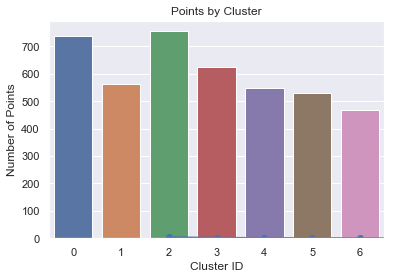

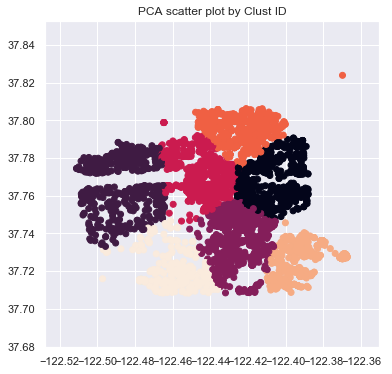

In [47]:
# Create a KMeans model with 4 clusters: model
model = KMeans(n_clusters=7)

# Use fit_predict to fit model and obtain cluster labels: labels
housing_inventory['cluster_labels'] = model.fit_predict(housing_inventory[x_cols])

cluster_counts = housing_inventory.cluster_labels.value_counts(sort=False)

# Plot by Count by Cluster
_ = sns.barplot(x=cluster_counts.index, y=cluster_counts)
_ = plt.title('Points by Cluster')
_ = plt.xlabel('Cluster ID')
_ = plt.ylabel('Number of Points')

# Plot Scatter plot w/ Color Coding
_ = plt.figure(figsize=(6,6))
_ = plt.scatter(housing_inventory.lat, housing_inventory.lon, c=housing_inventory.cluster_labels)
_ = plt.axis('equal')
_ = plt.title('PCA scatter plot by Clust ID')
_ = plt.show()

# Apartments

In [49]:
# Filter to Apartments
apartments = housing_inventory[housing_inventory['prop_use'] == 'APARTMENTS']

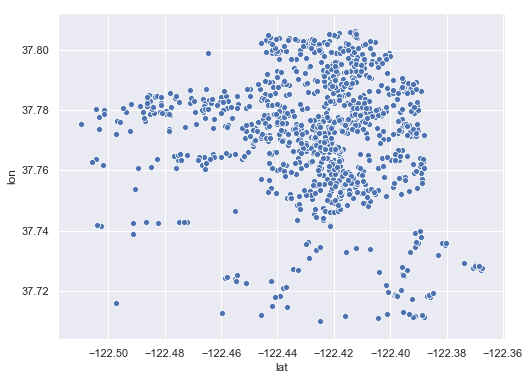

In [50]:
# Full Housing Investory Mapped
_ = plt.figure(figsize=(8,6))
_ = sns.scatterplot(x='lat', y='lon', data=apartments)

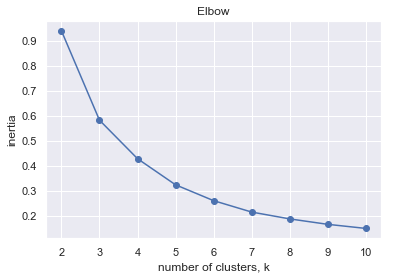

In [51]:
ks = range(2, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(apartments[x_cols])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
_ = plt.plot(ks, inertias, '-o')
_ = plt.xlabel('number of clusters, k')
_ = plt.ylabel('inertia')
_ = plt.xticks(ks)
_ = plt.title('Elbow')

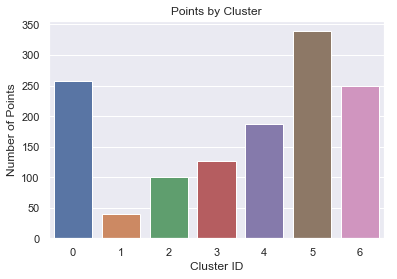

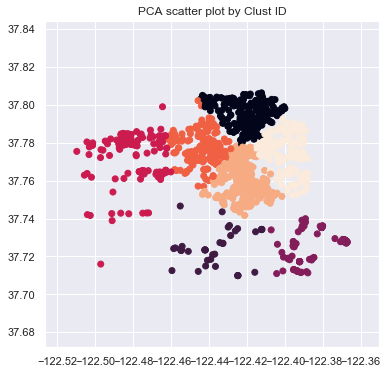

In [53]:
# 
apartments = apartments.copy()

# Create a KMeans model with 4 clusters: model
model = KMeans(n_clusters=7)

# Use fit_predict to fit model and obtain cluster labels: labels
apartments['cluster_labels'] = model.fit_predict(apartments[x_cols])

cluster_counts = apartments.cluster_labels.value_counts(sort=False)

# Plot by Count by Cluster
_ = sns.barplot(x=cluster_counts.index, y=cluster_counts)
_ = plt.title('Points by Cluster')
_ = plt.xlabel('Cluster ID')
_ = plt.ylabel('Number of Points')

# Plot Scatter plot w/ Color Coding
_ = plt.figure(figsize=(6,6))
_ = plt.scatter(apartments.lat, apartments.lon, c=apartments.cluster_labels)
_ = plt.axis('equal')
_ = plt.title('PCA scatter plot by Clust ID')
_ = plt.show()

# 2 Family Dwellings

In [54]:
# Filter 2 Family Dwellings
two_fam_dwelling = housing_inventory[housing_inventory['prop_use'] == '2 FAMILY DWELLING']

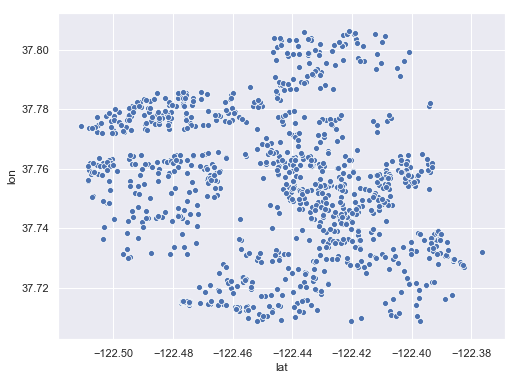

In [55]:
# Full Housing Investory Mapped
_ = plt.figure(figsize=(8,6))
_ = sns.scatterplot(x='lat', y='lon', data=two_fam_dwelling)

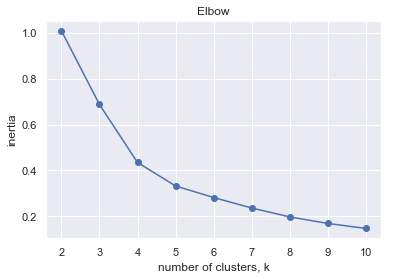

In [59]:
ks = range(2, 11)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(two_fam_dwelling[x_cols])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
_ = plt.plot(ks, inertias, '-o')
_ = plt.xlabel('number of clusters, k')
_ = plt.ylabel('inertia')
_ = plt.xticks(ks)
_ = plt.title('Elbow')

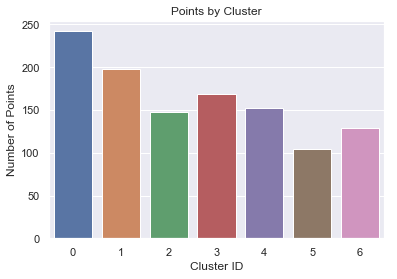

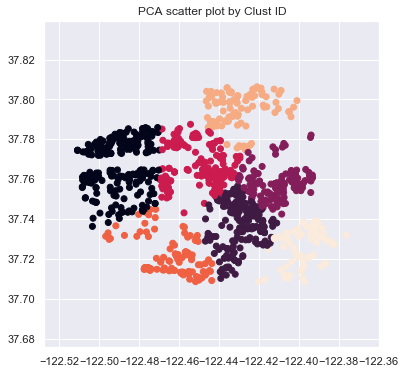

In [58]:
# 
two_fam_dwelling = two_fam_dwelling.copy()

# Create a KMeans model with 4 clusters: model
model = KMeans(n_clusters=7)

# Use fit_predict to fit model and obtain cluster labels: labels
two_fam_dwelling['cluster_labels'] = model.fit_predict(two_fam_dwelling[x_cols])

cluster_counts = two_fam_dwelling.cluster_labels.value_counts(sort=False)

# Plot by Count by Cluster
_ = sns.barplot(x=cluster_counts.index, y=cluster_counts)
_ = plt.title('Points by Cluster')
_ = plt.xlabel('Cluster ID')
_ = plt.ylabel('Number of Points')

# Plot Scatter plot w/ Color Coding
_ = plt.figure(figsize=(6,6))
_ = plt.scatter(two_fam_dwelling.lat, two_fam_dwelling.lon, c=two_fam_dwelling.cluster_labels)
_ = plt.axis('equal')
_ = plt.title('PCA scatter plot by Clust ID')
_ = plt.show()

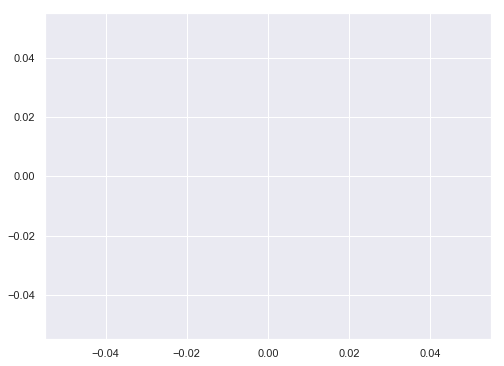

In [56]:
# Full Housing Investory Mapped
_ = plt.figure(figsize=(8,6))
_ = sns.scatterplot(x='lat', y='lon', data=housing_inventory[housing_inventory['prop_use'] == '1 FAMILY DWELLING'])